<a href="https://colab.research.google.com/github/ezahner/IDS/blob/main/Project4/Project4_Part2_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Erin Zahner
--


**Project 4 - Part 2 - R**
--

In [1]:
library(readr)
data <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv", show_col_types = FALSE)

In [2]:
summary(data)

  food item         weight_in_grams  saturated_fat      cholesterol     
 Length:961         Min.   :   0.4   Min.   :  0.000   Min.   :   0.00  
 Class :character   1st Qu.:  32.0   1st Qu.:  0.000   1st Qu.:   0.00  
 Mode  :character   Median : 113.0   Median :  0.400   Median :   0.00  
                    Mean   : 149.4   Mean   :  3.988   Mean   :  32.55  
                    3rd Qu.: 218.0   3rd Qu.:  3.300   3rd Qu.:  20.00  
                    Max.   :1542.0   Max.   :119.900   Max.   :2053.00  



---


The first order of business is cleaning up the data of any noise. Looking at the summary of the table, we can see that there are some 0s in all three of the columns. Normally, I would impute these values with the mean, however, in this case these 0s are likely to be accurate. Since we are measuring saturated fat and cholesterol in food, it is likely that some foods (especially if they are in small quantities) should contain 0 values. To avoid skewing the results by imputing the mean, I am choosing to ignore the 0 values.


---



In [3]:
#sort dataset by saturated fat in descending order
sorted_by_satfat <- data[order(-data$saturated_fat), ]

#print the first 5 of the table (5 food items with highest levels of sat fat)
print(head(sorted_by_satfat, 5))

# A tibble: 5 × 4
  `food item`                          weight_in_grams saturated_fat cholesterol
  <chr>                                          <dbl>         <dbl>       <dbl>
1 CHEESECAKE                    1 CAKE            1110         120.         2053
2 ICE CREAM; VANLLA; RICH 16% FT1/2 G…            1188         118.          703
3 YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE            1108          92           609
4 CREME PIE                     1 PIE              910          90.1          46
5 LARD                          1 CUP              205          80.4         195




---


These results of the foods that are the highest in saturated fat have to be taken with a grain of salt. Some of the items in the list are as big as a whole cake (cheesecake), while others are only measured by a cup (lard). In order to properly compare which foods are the highest in saturated fat, we would want a more consistent unit of measurement amoung all food items.


---



In [4]:
#create new column for saturated far per gram by dividing saturated fat by weight in grams
data$saturated_fat_per_gram <- (data$saturated_fat/data$weight_in_grams)

#sort by saturated fat per gram
sorted_by_fat_per_gram <- data[order(-data$saturated_fat_per_gram), ]

#print first 5
print(head(sorted_by_fat_per_gram, 5))

# A tibble: 5 × 5
  `food item`   weight_in_grams saturated_fat cholesterol saturated_fat_per_gram
  <chr>                   <dbl>         <dbl>       <dbl>                  <dbl>
1 BUTTER; SALT…              14           7.1          31                  0.507
2 BUTTER; UNSA…              14           7.1          31                  0.507
3 BUTTER; SALT…             113          57.1         247                  0.505
4 BUTTER; UNSA…             113          57.1         247                  0.505
5 BUTTER; SALT…               5           2.5          11                  0.5  




---




After calculating the saturated fat per gram, we can see that the foods with the highest saturated fat have changed. Now, the foods with the highest saturated fat per gram are salted and unsalted butter.


---



In [5]:
#create column for scaled saturated fat per gram
data$scaled_sat_fat_per_gram <- scale(data$saturated_fat_per_gram)

#create three sigma rule for outliers
three_sigma_rule <- (data$scaled_sat_fat_per_gram < -3 |
                     data$scaled_sat_fat_per_gram > 3 )

#used to print outliers
outliers <- data[three_sigma_rule , ]

#order outliers in descending order
outliers <- outliers[order(-outliers$scaled_sat_fat_per_gram), ]


#print
cat ("There are", sum(three_sigma_rule), "outliers \n\n")

print(outliers)


There are 15 outliers 

# A tibble: 15 × 6
   `food item`  weight_in_grams saturated_fat cholesterol saturated_fat_per_gram
   <chr>                  <dbl>         <dbl>       <dbl>                  <dbl>
 1 BUTTER; SAL…            14             7.1          31                  0.507
 2 BUTTER; UNS…            14             7.1          31                  0.507
 3 BUTTER; SAL…           113            57.1         247                  0.505
 4 BUTTER; UNS…           113            57.1         247                  0.505
 5 BUTTER; SAL…             5             2.5          11                  0.5  
 6 BUTTER; UNS…             5             2.5          11                  0.5  
 7 LARD       …            13             5.1          12                  0.392
 8 LARD       …           205            80.4         195                  0.392
 9 IMITATION C…             2             0.7           0                  0.35 
10 CHOCOLATE; …            28.4           9             0         

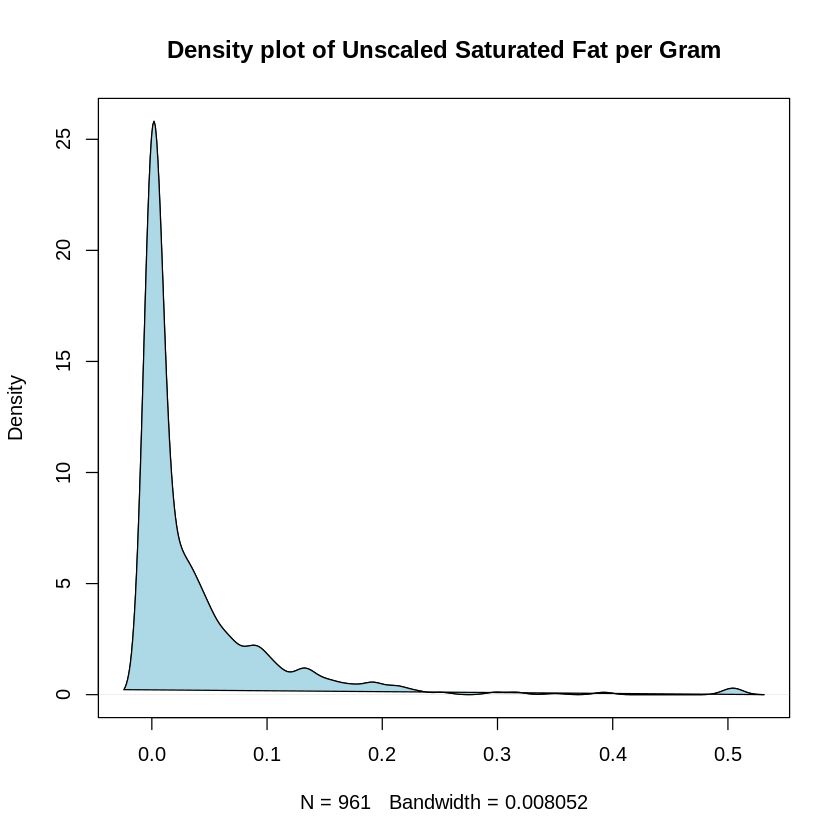

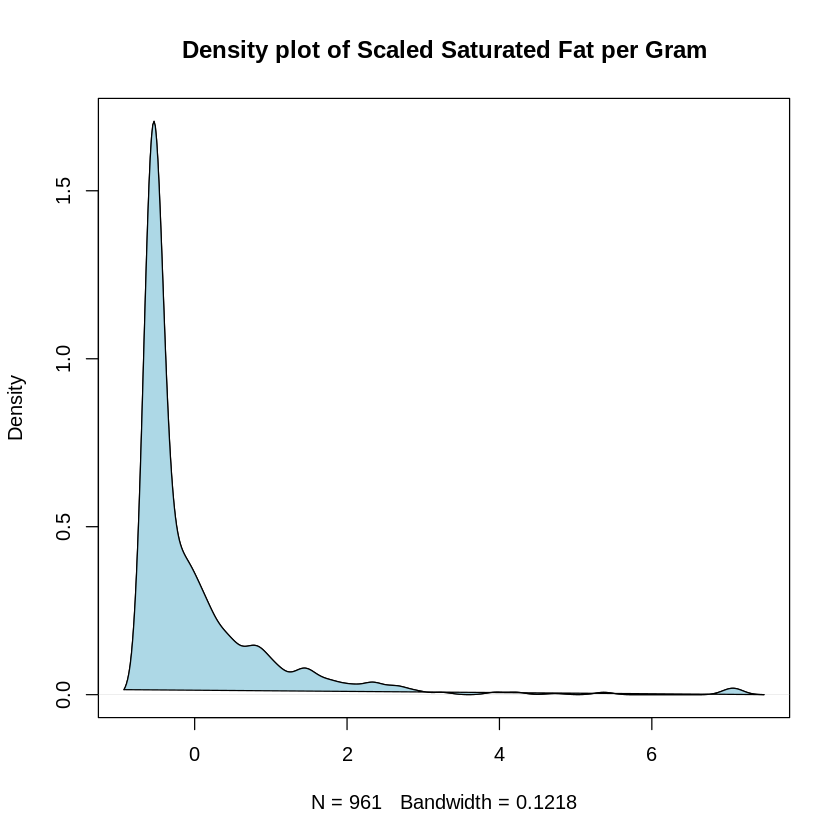

In [6]:
#create density plot for unscaled sat fat per gram
d1 <- density(data$saturated_fat_per_gram, na.rm = TRUE)
plot(d1, main="Density plot of Unscaled Saturated Fat per Gram")
polygon(d1, col="lightblue", border="black")

#create density plot for scaled sat fat per gram
d2 <- density(data$scaled_sat_fat_per_gram, na.rm = TRUE)
plot(d2, main="Density plot of Scaled Saturated Fat per Gram")
polygon(d2, col="lightblue", border="black")

In [8]:
#find outliers for any other numeric values - weight

# Scale the 'weight_in_grams' column
data$scaled_weight <- scale(data$weight_in_grams)

# Find outliers
weight_outliers <- data[data$scaled_weight > 3 | data$scaled_weight < -3, ]

# Sort the values in descending order
weight_outliers <- weight_outliers[order(-weight_outliers$scaled_weight), ]

# Get the number of outliers
num_outliers <- nrow(weight_outliers)

# Print out results
cat("There are", num_outliers, "outliers\n")
print(weight_outliers)


There are 22 outliers
# A tibble: 22 × 7
   `food item`  weight_in_grams saturated_fat cholesterol saturated_fat_per_gram
   <chr>                  <dbl>         <dbl>       <dbl>                  <dbl>
 1 SHERBET; 2%…            1542          19           113                 0.0123
 2 CARROT CAKE…            1536          66          1183                 0.0430
 3 FRUITCAKE;D…            1361          47.6         640                 0.0350
 4 ICE CREAM; …            1188         118.          703                 0.0996
 5 WHITE CAKE …            1140          33.1          46                 0.0290
 6 CHEESECAKE …            1110         120.         2053                 0.108 
 7 YELLOW CAKE…            1108          47.8         576                 0.0431
 8 YELLOWCAKE …            1108          92           609                 0.0830
 9 DEVIL'S FOO…            1107          55.6         598                 0.0502
10 SHEETCAKE;W…            1096          41.6         636           

In [9]:
#find outliers for any other numeric values - cholesterol

# Scale the 'weight_in_grams' column
data$scaled_cholesterol <- scale(data$cholesterol)

# Find outliers
cholesterol_outliers <- data[data$scaled_cholesterol > 3 | data$scaled_cholesterol < -3, ]

# Sort the values in descending order
cholesterol_outliers <- cholesterol_outliers[order(-cholesterol_outliers$scaled_weight), ]

# Get the number of outliers
num_outliers <- nrow(cholesterol_outliers)

# Print out results
cat("There are", num_outliers, "outliers\n")
print(cholesterol_outliers)

There are 17 outliers
# A tibble: 17 × 8
   `food item`  weight_in_grams saturated_fat cholesterol saturated_fat_per_gram
   <chr>                  <dbl>         <dbl>       <dbl>                  <dbl>
 1 CARROT CAKE…            1536          66          1183                 0.0430
 2 FRUITCAKE;D…            1361          47.6         640                 0.0350
 3 ICE CREAM; …            1188         118.          703                 0.0996
 4 CHEESECAKE …            1110         120.         2053                 0.108 
 5 YELLOW CAKE…            1108          47.8         576                 0.0431
 6 YELLOWCAKE …            1108          92           609                 0.0830
 7 DEVIL'S FOO…            1107          55.6         598                 0.0502
 8 SHEETCAKE;W…            1096          41.6         636                 0.0380
 9 ICE CREAM; …            1064          71.3         476                 0.0670
10 CUSTARD PIE…             910          33.7        1010           



---

Here, I found that there were 22 outliers in both the weight and cholesterol data. Cheesecake is a very extreme outlier for cholesterol, with a scaled value of 16.85. In normal cases, one may assume there has been a mistake to have such an extreme outlier, however, I believe that it is very acurate as a measure of cholestoral in a whole cheesecake. There are also some outliers present in the weight data, however, nothing sticks out quite as much.


---







---

**Conclusion**
Overall, we can see that there are some anomalies within the data. There are several values that would normally be considered "noise" within the data, however, because we are looking at things such as nutritional facts and weight, I determined that the noise is more likely accurate than skewing the data. The only thing that was majorly skewing the data was looking at every food item the same, regardless of the measurement, such as a whole cheesecake vs 1 TBSP of butter. To handle this, I added the column for saturated fat per gram. Other than that, this data set is a good represantation of food data.


---

